Линейная регрессия — модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости.Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.
Простейшая линейная регрессия задается следующими формулами: a(x) = b0 + b1*x
                                                             y = a(x) + eps.
Где b1 вектор коэффициентов, который находится различными методами, такими как метод наименьших квадратов, а также различные методы градиентного спуска.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
data = pd.read_csv('./src/fix_data.csv')

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
x = data['battery_size'].values.reshape(-1, 1)
y = data['best_price'].values
model = LinearRegression().fit(x,y)

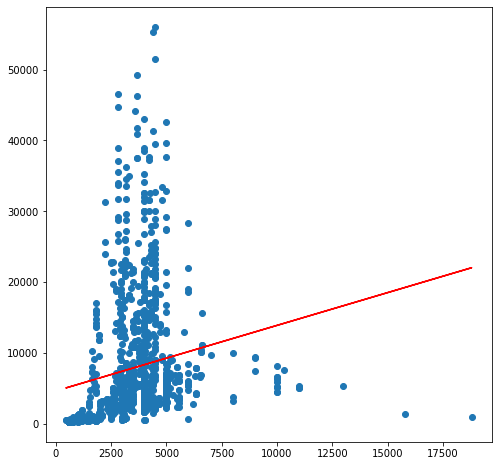

In [5]:
# new_x = np.array([x.min(), x.max()])
y_pred = model.predict(x.reshape(-1, 1))
plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')

Как можно заметить для пары данных "Размер батареи"-"Цена" не очень подходит линейная регрессия. Происходит это из-за того, что на рынке мобильных устройств присутствуют телефоны с аккумулятором большого объема и низкой стоимостью, но ограниченные во всех остальных возможностях по сравнению с современными смартфонами, которые составляют основную долю рынка.

Возьмем в качестве независимых переменных линейной регрессии только смартфоны на базе операционных систем Android и iOS

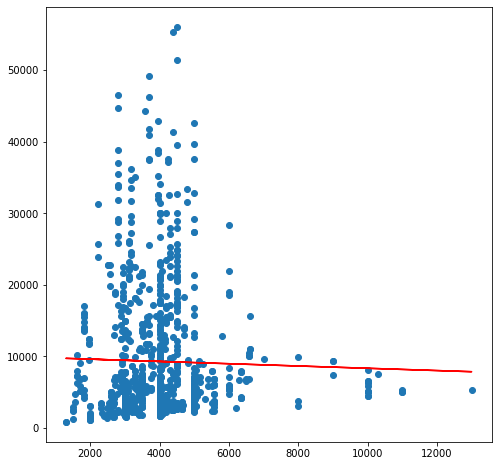

In [6]:
new_data = data[(data.os == 'iOS') | (data.os == 'Android')]
x2 = new_data.battery_size.values.reshape(-1, 1)
y2 = new_data.best_price.values
model2 = LinearRegression().fit(x2,y2)

# new_x2 = np.array([x.min(), x.max()])
y2_pred = model2.predict(x2.reshape(-1, 1))
plt.figure(figsize=(8, 8))
plt.scatter(x2, y2)
plt.plot(x2, y2_pred, color='r')

Как можно заметить, если оставить только телефоны с операционными системами Android и iOS, то линейная регрессия все равно не дает удачной модели. 

R2:  0.030086098544952256


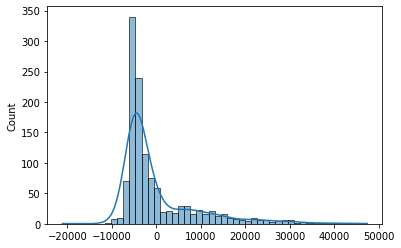

In [7]:
errors = y - y_pred
sns.histplot(data=errors, bins=50, kde=True)
print('R2: ', r2_score(y, y_pred))

### REVIEW. Автор ревью: Aladiev, дата ревью: 24/03/2021,
### Текст ревью: рекомендую всё же использовать функцию histplot из пакета seaborn. Пример: sns.histplot(data=errors, kde=True)
### Текст ответа: добавлена гистограмма из seaborn, дата ревью: 27/03/2021

Как можно заметить по всплеску в районе -10000:0 ошибки распределены ненормально, что еще раз подтверждает, что линейная регрессия не подходит в данном случае
Также видно, что ошибка R2 довольно низкая 

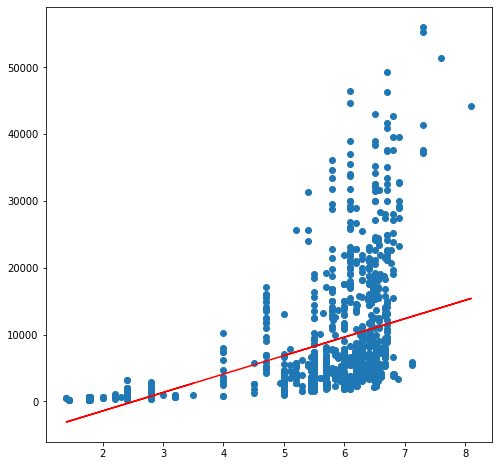

In [8]:
x3 = data.screen_size.values.reshape(-1, 1)
model3 = LinearRegression().fit(x3,y)
y3_pred = model3.predict(x3)

plt.figure(figsize=(8, 8))
plt.scatter(x3, y)
plt.plot(x3, y3_pred, color='r')

При замене независимой переменной с размера батареи на размер экрана можно заметить, что линейная регрессия всё еще не дает хороших результатов, но уже лучше, чем было до этого
Также ошибка R2 тут уже в разы выше

R2:  0.21048454046830956


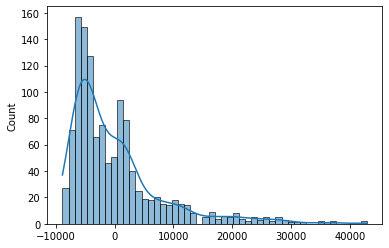

In [9]:
sns.histplot(data = y-y3_pred, bins=50, kde=True)
print('R2: ', r2_score(y, y3_pred))

Проверим станет ли данная регрессия работать лучше, если обучить ее с помощью тестовой выборки:

R2:  0.2177195727238468


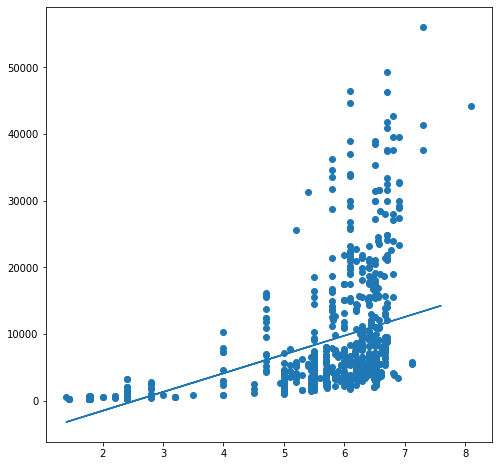

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x3, y, test_size = 0.33, random_state = 42)
model_split = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model_split.predict(x_test)

plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred)

print('R2: ', r2_score(y_test, y_pred))

По ошибке R2 видно, что улучшение есть, но оно незначительно